In [4]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 5)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [21]:
usa = pd.read_csv('E:/Data_science/USA_Univ.csv')
usa_1= pd.read_csv('E:/Data_science/USA_Univ.csv')

In [22]:

usa.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [23]:
usa.drop(['private'],axis=1,inplace= True )

In [24]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
apps           777 non-null int64
accept         777 non-null int64
enroll         777 non-null int64
top10perc      777 non-null int64
top25perc      777 non-null int64
f_undergrad    777 non-null int64
p_undergrad    777 non-null int64
outstate       777 non-null int64
room_board     777 non-null int64
books          777 non-null int64
personal       777 non-null int64
phd            777 non-null int64
terminal       777 non-null int64
s_f_ratio      777 non-null float64
perc_alumni    777 non-null int64
expend         777 non-null int64
grad_rate      777 non-null int64
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


Text(0, 0.5, 'Eucledian Distance')

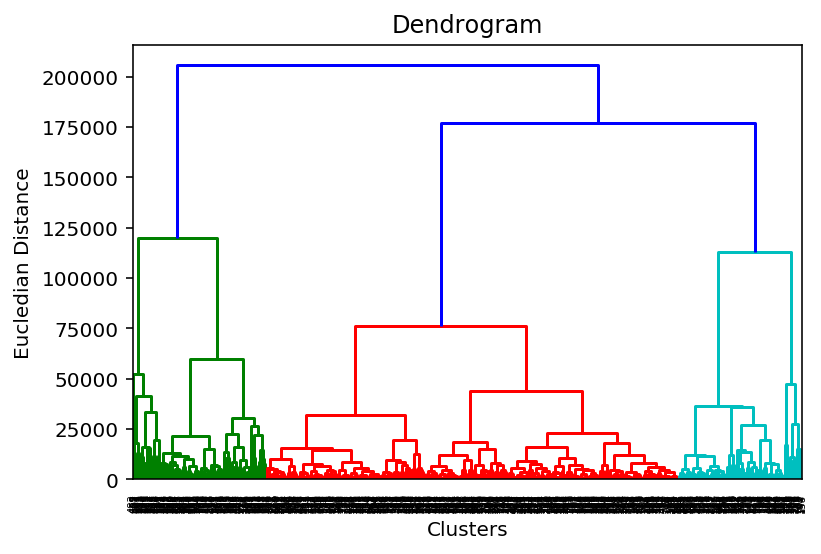

In [25]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(usa,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Eucledian Distance')

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity= 'euclidean', linkage ='ward')
private_new = hc.fit_predict(usa)
pred=pd.DataFrame(private_new)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
dummy = pd.get_dummies(usa_1['private'])


In [32]:
dummy

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
772,1,0
773,0,1
774,0,1
775,0,1


In [33]:
print(confusion_matrix(dummy['No'],pred))

[[554  11]
 [ 68 144]]


In [36]:
print(classification_report(dummy['No'],pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       565
           1       0.93      0.68      0.78       212

    accuracy                           0.90       777
   macro avg       0.91      0.83      0.86       777
weighted avg       0.90      0.90      0.89       777

